In [1]:
import logging
logging.basicConfig (
    format = '%(asctime)s [%(levelname)s] %(message)s',
    level = logging.DEBUG
)

from init import *

In [2]:
class Example1UKF (UnscentedKalmanFilter):
    
    def __init__ (self):
        super().__init__(2,1)

        # the true state (used in this test)
        self.__true_state = np.matrix([
            [11],
            [22]
        ], dtype=np.float64)
        
        # initial state estimate
        self.x = np.matrix([
            [-100],
            [-100]
        ], dtype=np.float64)

        # initial state error matrix
        big = 10
        self.P = np.matrix([
            [big, 0 ],
            [ 0, big]
        ], dtype=np.float64)
        
        self.monitor = KalmanFilterMonitor(self)

    def GetTrueState (self):
        '''optional, only useful for testing'''
        return self.__true_state
        
    def GetIterationTime (self,iteration):
        return float(iteration)
        
    def GetPredictedMeasurement (self, state, iteration):
        '''override'''
        assert state.shape == (2,1)
        value = state[0,0] + state[1,0]*self.GetIterationTime(iteration)
        return np.matrix([[value]], dtype=np.float64)
        
    def GetMeasurement (self, iteration):
        '''override'''
        scaling = 1
        measurement_error = scaling * np.random.default_rng().normal(0,1)
        error_matrix = np.matrix([[scaling]], dtype=np.float64)
        measurement_value = self.GetPredictedMeasurement(self.__true_state, iteration) + measurement_error
        return (measurement_value, error_matrix)
    
    def Log (self, iteration, name, value):
        self.monitor.AddData(iteration, name, value)

In [3]:
e = Example1UKF()
e.RunAllIterations(1,20)

In [4]:
import pandas as pd
df = pd.DataFrame(e.monitor._data)
df

,iteration,residual[0],residual.length,state[0],state[1],state_diff[0],state_diff[1],state_diff.length
0,1,-233.700661,54615.999002,11.286029,11.286029,0.286029,-10.713971,114.870985
1,2,-21.501640,462.320509,-0.030623,26.374899,-11.030623,4.374899,140.814394
2,3,3.666614,13.444060,1.824084,24.805531,-9.175916,2.805531,92.068435
3,4,1.690639,2.858260,2.539049,24.343332,-8.460951,2.343332,77.078895
4,5,3.719173,13.832250,3.860448,23.646111,-7.139552,1.646111,53.682887
5,6,2.928573,8.576541,4.751453,23.247840,-6.248547,1.247840,40.601443
6,7,2.416155,5.837804,5.392443,22.999011,-5.607557,0.999011,32.442717
7,8,2.166231,4.692557,5.901239,22.824359,-5.098761,0.824359,26.676936
8,9,2.183186,4.766303,6.360950,22.682880,-4.639050,0.682880,21.987114
9,10,3.434691,11.797099,7.016096,22.500123,-3.983904,0.500123,16.121615


<AxesSubplot: xlabel='iteration'>

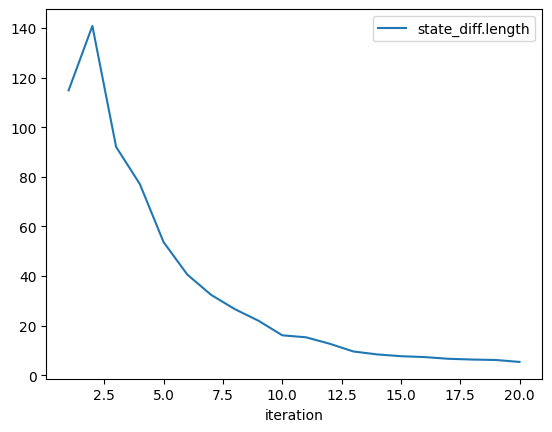

In [7]:
df.plot(x='iteration', y='state_diff.length')

<AxesSubplot: xlabel='iteration'>

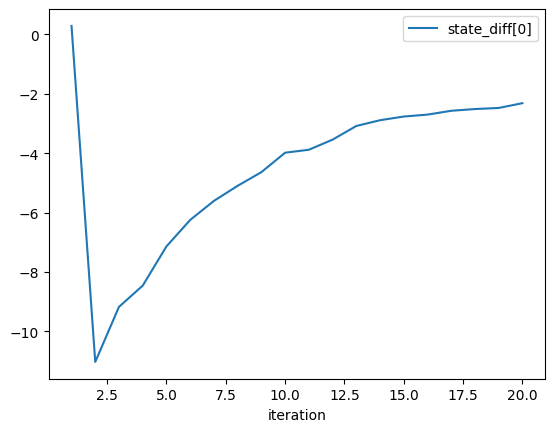

In [8]:
df.plot(x='iteration', y='state_diff[0]')

<AxesSubplot: xlabel='iteration'>

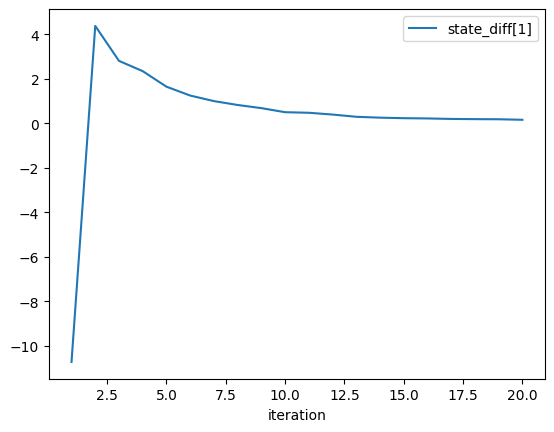

In [9]:
df.plot(x='iteration', y='state_diff[1]')